In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from numpy.linalg import pinv
%matplotlib inline

# Part 1: Least Squares

## 1. Generate classification data of two classes

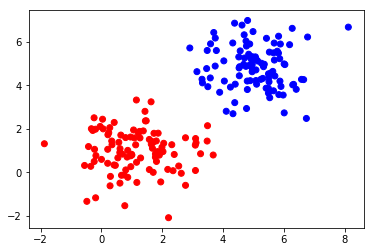

In [5]:
K = 2
N1 = 100
N2 = 100
sigma=1.0
#### Returns an array of X, X1, X2 and color ####
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, color]
    return data

data = generate_classification_data(100, 100, 2, 1.0)
X = data[0]
X1 = data[1]
X2 = data[2]
color = data[3]

def calculate_T(X, X1, X2, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)):
            T[n][1] = 1
    T = T.astype(int)
    return T

T = calculate_T(X, X1, X2, K)

## 2. Write code to estimate matrix W using the least-squares method.

In [6]:
def calculate_phi(x, typ):
    shape = x.shape
    N = shape[0]
    M = shape[1]
    phi = np.zeros([N, M])
    
    if (typ=="gaussian"):
        for n in range(0, N): 
            s = 0.25    # standard deviation
            u = 0       # mean
            for m in range(0, M):
                phi[n][m] = np.exp(-np.power(x[n][m] - u, 2)/(2*s*s))
                u += s
    elif (typ==None):
        for n in range(0, N):
            for m in range(0, M):
                phi[n][m] = x[n][m]
    
    # to take into account the intercept so it doesn't always pass through the origin
    intercept = np.ones((N, 1))
    phi = np.hstack((phi, intercept))
    return phi

def calculate_w(phi, T):
    phi_t_phi_inv = pinv(phi.transpose().dot(phi))
    w = phi_t_phi_inv.dot(phi.transpose().dot(T))
    return w

In [7]:
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
print(w)

[[-0.11395731  0.11395731]
 [-0.11491081  0.11491081]
 [ 1.18879077 -0.18879077]]


## 3. Draw the decision line

(200, 3)
Class 1 slope: -0.991702283378
Class 2 slope: -0.991702283378


<function matplotlib.pyplot.show>

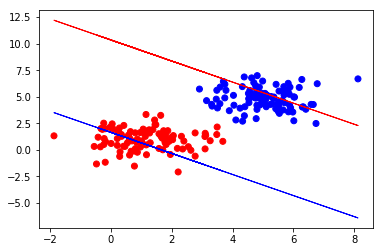

In [8]:
def include_dummy_x(X):
    if (X.shape==(len(X[: , 0]), 3)):
        return(X)
    else:
        dummy_x = np.ones((len(X[: , 0]),1))
        X = np.hstack((X, dummy_x))
        return(X)

def plot_class1_line(x1, w):
    slope = - w[0][0]/w[1][0]
    print("Class 1 slope: %s" % slope)
    intercept = - w[2][0] /w[1][0]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='r')

def plot_class2_line(x1, w):
    slope = - w[0][1]/w[1][1]
    print("Class 2 slope: %s" % slope)
    intercept = - w[2][1] /w[1][1]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='b')

new_X = include_dummy_x(X)
print(new_X.shape)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show


## 4. Change sigma to 7.0, and draw the decision line.

Class 1 slope: -1.09198729606
Class 2 slope: -1.09198729606


<function matplotlib.pyplot.show>

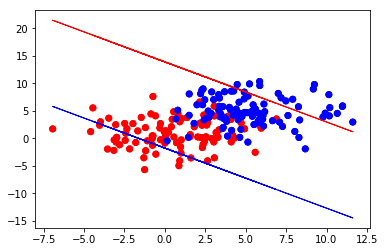

In [9]:
data = generate_classification_data(N1, N2, K, 7.0)
X = data[0]
X1 = data[1]
X2 = data[2]
color = data[3]

T = calculate_T(X, X1, X2, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

## 5. Discuss how the classification performance is affected by it.

The classification is slightly weaker as the lines do not pass through the mean of each class respectively. The slope of the least squares line is also relatively steep

## 6. Keep sigma=7.0, but now change N2=10. Draw the decision line.

Class 1 slope: -0.923304634817
Class 2 slope: -0.923304634817


<function matplotlib.pyplot.show>

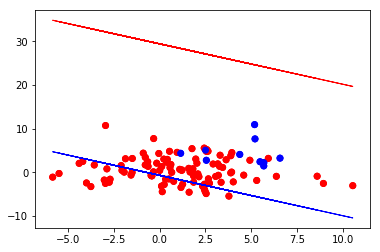

In [10]:
N1= 100
N2 = 10
K = 2
sigma = 7.0
data = generate_classification_data(N1, N2, K, sigma)
X = data[0]
X1 = data[1]
X2 = data[2]
color = data[3]

T = calculate_T(X, X1, X2, 2)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

## 7. Discuss how the classification performance is affected by it.

The classification is much weaker because the classifier takes into account less number of blue points. Thus, there is a strong bias to the red points now.

## 8. Set sigma=4.0 and N1=N2=100. Change tn to {-1, +1}, and draw the decision. 

Class 1 slope: -1.18675891422
Class 2 slope: -1.18675891422


<function matplotlib.pyplot.show>

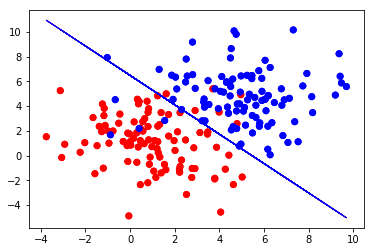

In [11]:
data = generate_classification_data(100, 100, 2, 4.0)
X = data[0]
X1 = data[1]
X2 = data[2]
color = data[3]

def calculate_T(X, X1, X2, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
            T[n][1] = -1
        if (n>=N1 and n<len(X1) + len(X2)):
            T[n][1] = 1
            T[n][0] = -1
    T = T.astype(int)
    return T

T = calculate_T(X, X1, X2, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

## 9. Set tn back to {0, 1}, sigma=1.0. Modify the code for generating the data so that it includes outliers (the number of outlier points = 100, the same N2): 

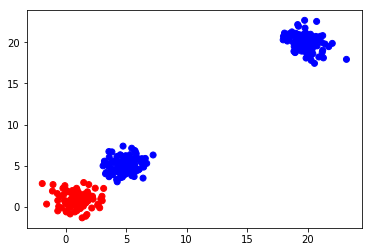

In [12]:
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    mean = (20, 20)
    cov =  [[sigma, 0], [0, sigma]]
    X_out = random.multivariate_normal(mean, cov, N2)
    c3 = ['blue'] * len(X_out)
    
    X = np.concatenate((X1, X2, X_out))
    color = np.concatenate((c1, c2, c3))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, X_out, color]
    return data

N1 = N2 = 100
sigma = 1.0
data = generate_classification_data(N1, N2, K, sigma)
X = data[0]
X1 = data[1]
X2 = data[2]
X_out = data[3]
color = data[4]

## 10. Draw the decision lines (the left figure is when tn is {0,1}, and the right figure when tn is {-1, +1}): 

Class 1 slope: 0.0838363207536
Class 2 slope: 0.0838363207536


<function matplotlib.pyplot.show>

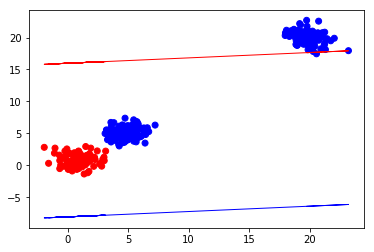

In [13]:
def calculate_T(X, X1, X2, X_out, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)+len(X_out)):
            T[n][1] = 1
    T = T.astype(int)
    return T

T = calculate_T(X, X1, X2, X_out, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

Class 1 slope: 0.0838363207536
Class 2 slope: 0.0838363207536


<function matplotlib.pyplot.show>

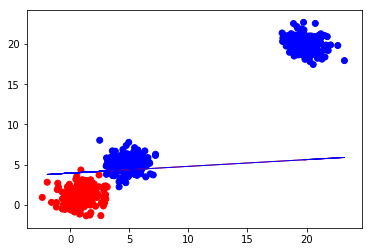

In [14]:
data = generate_classification_data(N1, N2, K, sigma)
def calculate_T(X, X1, X2, X_out, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
            T[n][1] = -1
        if (n>=N1 and n<len(X1) + len(X2)+len(X_out)):
            T[n][1] = 1
            T[n][0] = -1
    T = T.astype(int)
    return T

T = calculate_T(X, X1, X2, X_out, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

## 11. Explain what's wrong with the lines.

The cluster at mean (5,5) is now considered the same distances as the red cluster at (0, 0). This means that the classifier would not be able to classify the blue dots at mean (5,5) as the blue class anymore.

## 12. Write code to generate 3 classes, where the means of the 3 clusters are located at (1,5), (5,10) and (10,5). Set sigma = 1. Display the result. 

(300, 2)


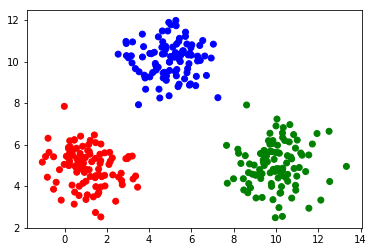

In [15]:
def generate_classification_data(N1, N2, N3, K, sigma):
    mean = (1, 5)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (5, 10)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    mean = (10, 5)
    cov =  [[sigma, 0], [0, sigma]]
    X3 = random.multivariate_normal(mean, cov, N3)
    c3 = ['green'] * len(X_out)
    
    X = np.concatenate((X1, X2, X3))
    color = np.concatenate((c1, c2, c3))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, X3, color]
    return data

data = generate_classification_data(100, 100, 100, 3, 1.0)
X = data[0]
print(X.shape)
X1= data[1]
X2 = data[2]
X3 = data[3]
color = data[4]

## 13. Compute W, and draw the decision lines: 

(300, 2)
Class 1 slope: -1.04179081561
Class 2 slope: 0.0255394941623
Class 2 slope: 1.34294090517


<function matplotlib.pyplot.show>

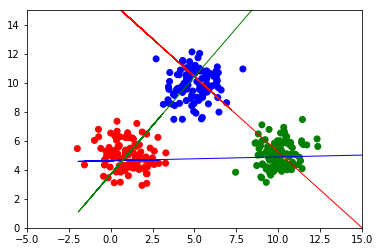

In [16]:
data = generate_classification_data(100, 100, 100, 3, 1.0)
X = data[0]
print(X.shape)
X1= data[1]
X2 = data[2]
X3 = data[3]
color = data[4]

def calculate_T(X, X1, X2, X3, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=len(X1) and n<len(X1) + len(X2)):
            T[n][1] = 1
        if (n>=len(X1) + len(X2) and n < len(X1) + len(X2) + len(X3)):
            T[n][2] = 1
    T = T.astype(int)
    return T

def plot_class3_line(x1, w):
    slope = - w[0][2]/w[1][2]
    print("Class 2 slope: %s" % slope)
    intercept = - w[2][2] /w[1][2]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='g')

T = calculate_T(X, X1, X2, X3, 3)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plot_class3_line(x1, w)
plt.xlim(-5, 15)
plt.ylim(-0, 15)
plt.show

## 14. Change the means to (1,5), (5,10), (10,15), and draw the decision lines.

(300, 2)
Class 1 slope: -0.266042232994
Class 2 slope: 1.2246405145
Class 2 slope: -1.44221687206


<function matplotlib.pyplot.show>

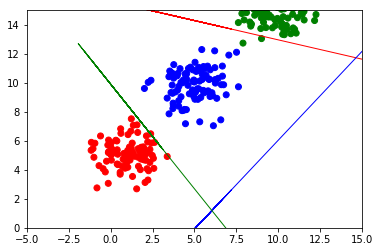

In [17]:
def generate_classification_data(N1, N2, N3, K, sigma):
    mean = (1, 5)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (5, 10)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    mean = (10, 15)
    cov =  [[sigma, 0], [0, sigma]]
    X3 = random.multivariate_normal(mean, cov, N3)
    c3 = ['green'] * len(X_out)
    
    X = np.concatenate((X1, X2, X3))
    color = np.concatenate((c1, c2, c3))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, X3, color]
    return data

data = generate_classification_data(100, 100, 100, 3, 1.0)
X = data[0]
print(X.shape)
X1= data[1]
X2 = data[2]
X3 = data[3]
color = data[4]

T = calculate_T(X, X1, X2, X3, 3)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plot_class3_line(x1, w)
plt.xlim(-5, 15)
plt.ylim(-0, 15)
plt.show

## 15. Concerning the decision lines, discuss what you observe.

The decision line for the blue points in the middle is completely off as it tries to place the line on both the green and the red. The lines for the green and red points are still good. 

# Part 2: Fisher's Linear Discriminant Analysis

## 1. Generate classification data of two classes with the same numbers of points for each class: 

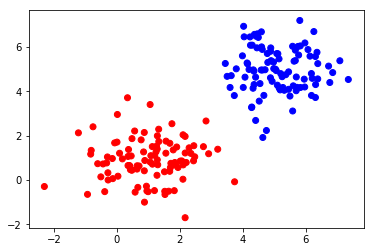

In [18]:
#### Returns an array of X, X1, X2 and color ####
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma, 0], [0, sigma]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (5, 5)
    cov = [[sigma, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    X = np.concatenate((X1, X2))
    color = np.concatenate((c1, c2))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, color]
    return data

def calculate_T(X, X1, X2, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)):
            T[n][1] = 1
    T = T.astype(int)
    return T

data = generate_classification_data(100, 100, 2, 1.0)

## 2. Write Fisher's LDA to estimate vector w, and draw the decision line: 

In [19]:
mu1 = (np.mean(X1[:,0]), np.mean(X1[:,1]))
mu2 = (np.mean(X2[:,0]), np.mean(X2[:,1]))
print(mu1, mu2)

(1.0126622099078597, 5.0889236840289467) (4.9913889180092736, 9.860274237565589)


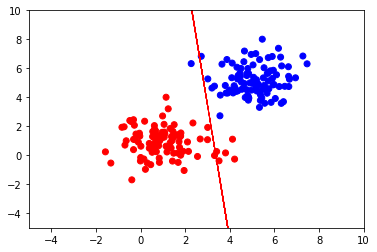

In [20]:
def calculate_Sw_inv(X, X1, X2, mu1, mu2):
    class1_cov = class2_cov = []
    for n in range(len(X)):
        if (n<len(X1)):
            class1_cov = ((X - mu1).transpose()).dot(X - mu1)
        if (n>=len(X1) and n<len(X1) + len(X2)):
            class2_cov = ((X - mu2).transpose()).dot(X - mu2)
    Sw = class1_cov + class2_cov
    Sw_inv = pinv(Sw)
    return Sw_inv

def calculate_w_fisher(Sw_inv, mu1, mu2):
    mean_diff = np.subtract(mu2, mu1).reshape((2,1))
#     print(mean_diff)
    w = Sw_inv.dot(mean_diff)
    return w
# print("w = %s" % w)

def calculate_w0(X, w):
    m = np.average(X, axis=0)
    w0 = w.transpose().dot(m)
    return w0

# print(w0)
def plot_fisher_line(x1, w, w0):
    slope = - w[0] / w[1]
#     print("slope: %s" % slope)
    intercept = w0 / w[1]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='r')

data = generate_classification_data(100, 100, 2, 1.0)
X = data[0]
X1 = data[1]
X2 = data[2]
color = data[3]
Sw_inv = calculate_Sw_inv(X, X1, X2, mu1, mu2)
w = calculate_w_fisher(Sw_inv, mu1, mu2)
w0 = calculate_w0(X, w)
plt.axis([-5,10,-5,10])
plot_fisher_line(x1, w, w0)

## 3. Generate data where the red population is 10 and blue's population is 200; the first principal axis of red is vertical and the first principal axis of blue are horizontal

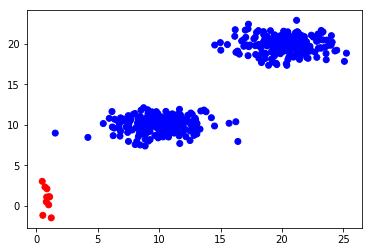

In [21]:
def generate_classification_data(N1, N2, K, sigma):
    mean = (1, 1)
    cov = [[sigma/10, 0], [0, sigma*4]]
    X1 = random.multivariate_normal(mean, cov, N1)
    c1 = ['red'] * len(X1)

    mean = (10, 10)
    cov = [[sigma *4, 0], [0, sigma]]
    X2 = random.multivariate_normal(mean, cov, N2)
    c2 = ['blue'] * len(X2)

    mean = (20, 20)
    cov =  [[sigma * 4, 0], [0, sigma]]
    X_out = random.multivariate_normal(mean, cov, N2)
    c3 = ['blue'] * len(X_out)
    
    X = np.concatenate((X1, X2, X_out))
    color = np.concatenate((c1, c2, c3))

    plt.scatter(X[ : , 0], X[: , 1], marker='o', c=color)
    plt.show
    
    data = [X, X1, X2, X_out, color]
    return data

data = generate_classification_data(10, 200, K, 1.0)

## 4. Use the least-squares method to compute matrix W, and draw the decision lines: 

In [22]:
X = data[0]
X1= data[1]
X2 = data[2]
X3 = data[3]
color = data[4]

def calculate_T(X, X1, X2, X_out, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
        if (n>=N1 and n<len(X1) + len(X2)+len(X_out)):
            T[n][1] = 1
    T = T.astype(int)
    return T

def calculate_phi(x, typ):
    shape = x.shape
    N = shape[0]
    M = shape[1]
    phi = np.zeros([N, M])
    
    if (typ=="gaussian"):
        for n in range(0, N): 
            s = 0.25    # standard deviation
            u = 0       # mean
            for m in range(0, M):
                phi[n][m] = np.exp(-np.power(x[n][m] - u, 2)/(2*s*s))
                u += s
    elif (typ==None):
        for n in range(0, N):
            for m in range(0, M):
                phi[n][m] = x[n][m]
    
    # to take into account the intercept so it doesn't always pass through the origin
    intercept = np.ones((N, 1))
    phi = np.hstack((phi, intercept))
    return phi

def calculate_w(phi, T):
    phi_t_phi_inv = pinv(phi.transpose().dot(phi))
    w = phi_t_phi_inv.dot(phi.transpose().dot(T))
    return w

def include_dummy_x(X):
    if (X.shape==(len(X[: , 0]), 3)):
        return(X)
    else:
        dummy_x = np.ones((len(X[: , 0]),1))
        X = np.hstack((X, dummy_x))
        return(X)

def plot_class1_line(x1, w):
    slope = - w[0][0]/w[1][0]
    print("Class 1 slope: %s" % slope)
    intercept = - w[2][0] /w[1][0]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='r')

def plot_class2_line(x1, w):
    slope = - w[0][1]/w[1][1]
    print("Class 2 slope: %s" % slope)
    intercept = - w[2][1] /w[1][1]
    x2 = slope * x1 + intercept
    plt.plot(x1, x2, linewidth=1.0, color='b')

[[-0.00161348  0.00137065]
 [-0.00968165 -0.00067662]
 [ 0.18945841  0.50179034]]
Class 1 slope: -0.166653140778
Class 2 slope: 2.02571824928


<function matplotlib.pyplot.show>

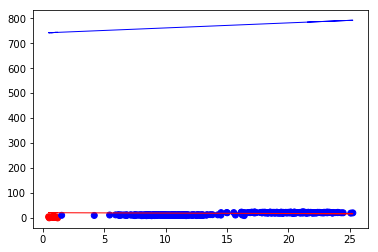

In [23]:
T = calculate_T(X, X1, X2, X_out, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
print(w)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

Class 1 slope: -0.331384293044
Class 2 slope: -0.331384293044


<function matplotlib.pyplot.show>

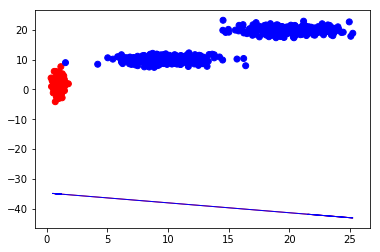

In [24]:
data = generate_classification_data(N1, N2, K, sigma)
def calculate_T(X, X1, X2, X_out, K):
    T = np.zeros([len(X), K])
    for n in range(0, len(X)):
        if (n<len(X1)):
            T[n][0] = 1
            T[n][1] = -1
        if (n>=N1 and n<len(X1) + len(X2)+len(X_out)):
            T[n][1] = 1
            T[n][0] = -1
    T = T.astype(int)
    return T

T = calculate_T(X, X1, X2, X_out, K)
phi = calculate_phi(X, None)
w = calculate_w(phi, T)
new_X = include_dummy_x(X)
x1 = new_X[: , 0]
x2 = new_X[: , 1]
plt.scatter(x1, x2, marker='o', c=color)
plot_class1_line(x1, w)
plot_class2_line(x1, w)
plt.show

## 5. Use Fisher's LDA method to compute vector w, and draw the decision line: 

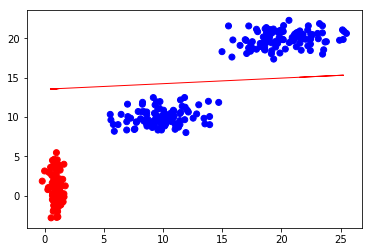

In [35]:
data = generate_classification_data(N1, N2, K, sigma)
mu1 = (np.mean(X1[:,0]), np.mean(X1[:,1]))
mu2 = (np.mean(X2[:,0]), np.mean(X2[:,1]))
Sw_inv = calculate_Sw_inv(X, X1, X2, mu1, mu2)
w = calculate_w_fisher(Sw_inv, mu1, mu2)
w0 = calculate_w0(X, w)
plot_fisher_line(x1, w, w0)

## 6. Discuss how different LDA compared to the least-squares in terms of correctness/robustness in the classification task.

LDA is much more robust and correct. It is robust in that it is not affected by the shape of the points, whether it be vertical or horizontal and correct in that it accurately splits between the two blue clusters evenly, meaning that only the red will be classified correctly